In [1]:
import pandas as pd
import numpy as np

train_path = "train.csv"
test_path = "val.csv"

In [2]:
# read data
train_raw_data = pd.read_csv(train_path, sep=";")
test_raw_data = pd.read_csv(test_path, sep=";")
raw_data = pd.concat([train_raw_data, test_raw_data])
n_train = len(train_raw_data)
n_test = len(test_raw_data)

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 99
Data columns (total 21 columns):
ID                                 640 non-null int64
Reason for absence                 640 non-null int64
Month of absence                   640 non-null int64
Day of the week                    640 non-null int64
Seasons                            640 non-null int64
Transportation expense             640 non-null int64
Distance from Residence to Work    640 non-null int64
Service time                       640 non-null int64
Age                                640 non-null int64
Work load Average/day              640 non-null float64
Hit target                         640 non-null int64
Disciplinary failure               640 non-null int64
Education                          640 non-null int64
Son                                640 non-null int64
Social drinker                     640 non-null int64
Social smoker                      640 non-null int64
Pet                           

In [4]:
raw_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,640.000000,640.000000,640.000000,640.000000,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.764063,19.440625,6.562500,3.893750,2.54375,223.457812,30.401563,12.667188,36.382812,275.071378,...,0.056250,1.242188,1.028125,0.585938,0.068750,0.692187,79.231250,171.882812,26.810938,6.631250
std,11.052682,8.419158,3.591744,1.427856,1.15387,65.853787,14.870952,4.331005,6.311082,40.245612,...,0.230584,0.612163,1.129692,0.492945,0.253226,1.176425,12.710067,5.945792,4.241557,12.279159
min,1.000000,0.000000,1.000000,2.000000,1.00000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.00000,179.000000,17.000000,9.000000,31.000000,246.074000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.00000,225.000000,26.000000,13.000000,37.000000,265.017000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.00000,260.000000,50.000000,16.000000,40.000000,302.585000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.00000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
# 相关性
# 皮尔逊相关系数
corr_matrix = raw_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
hm=sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15}, cmap="YlGnBu")
plt.show()

<Figure size 4000x4000 with 2 Axes>

In [6]:
corr_matrix['Absenteeism time in hours'].sort_values(ascending=False)

Absenteeism time in hours          1.000000
Height                             0.159911
Son                                0.068664
Social drinker                     0.052557
Age                                0.048493
Work load Average/day              0.047375
Month of absence                   0.028626
Hit target                         0.027758
Weight                             0.016962
Seasons                            0.014174
ID                                 0.006738
Service time                       0.002220
Education                         -0.014957
Transportation expense            -0.018801
Social smoker                     -0.024045
Pet                               -0.032028
Body mass index                   -0.055786
Distance from Residence to Work   -0.085970
Day of the week                   -0.112918
Disciplinary failure              -0.131947
Reason for absence                -0.182804
Name: Absenteeism time in hours, dtype: float64

In [7]:
raw_data = raw_data.drop(columns=["Age", "Work load Average/day ", "Month of absence", "Hit target", "Weight", "Seasons", "ID", "Service time", "Education", "Transportation expense", "Social smoker", "Pet"])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 99
Data columns (total 9 columns):
Reason for absence                 640 non-null int64
Day of the week                    640 non-null int64
Distance from Residence to Work    640 non-null int64
Disciplinary failure               640 non-null int64
Son                                640 non-null int64
Social drinker                     640 non-null int64
Height                             640 non-null int64
Body mass index                    640 non-null int64
Absenteeism time in hours          640 non-null int64
dtypes: int64(9)
memory usage: 50.0 KB


<Figure size 432x288 with 0 Axes>

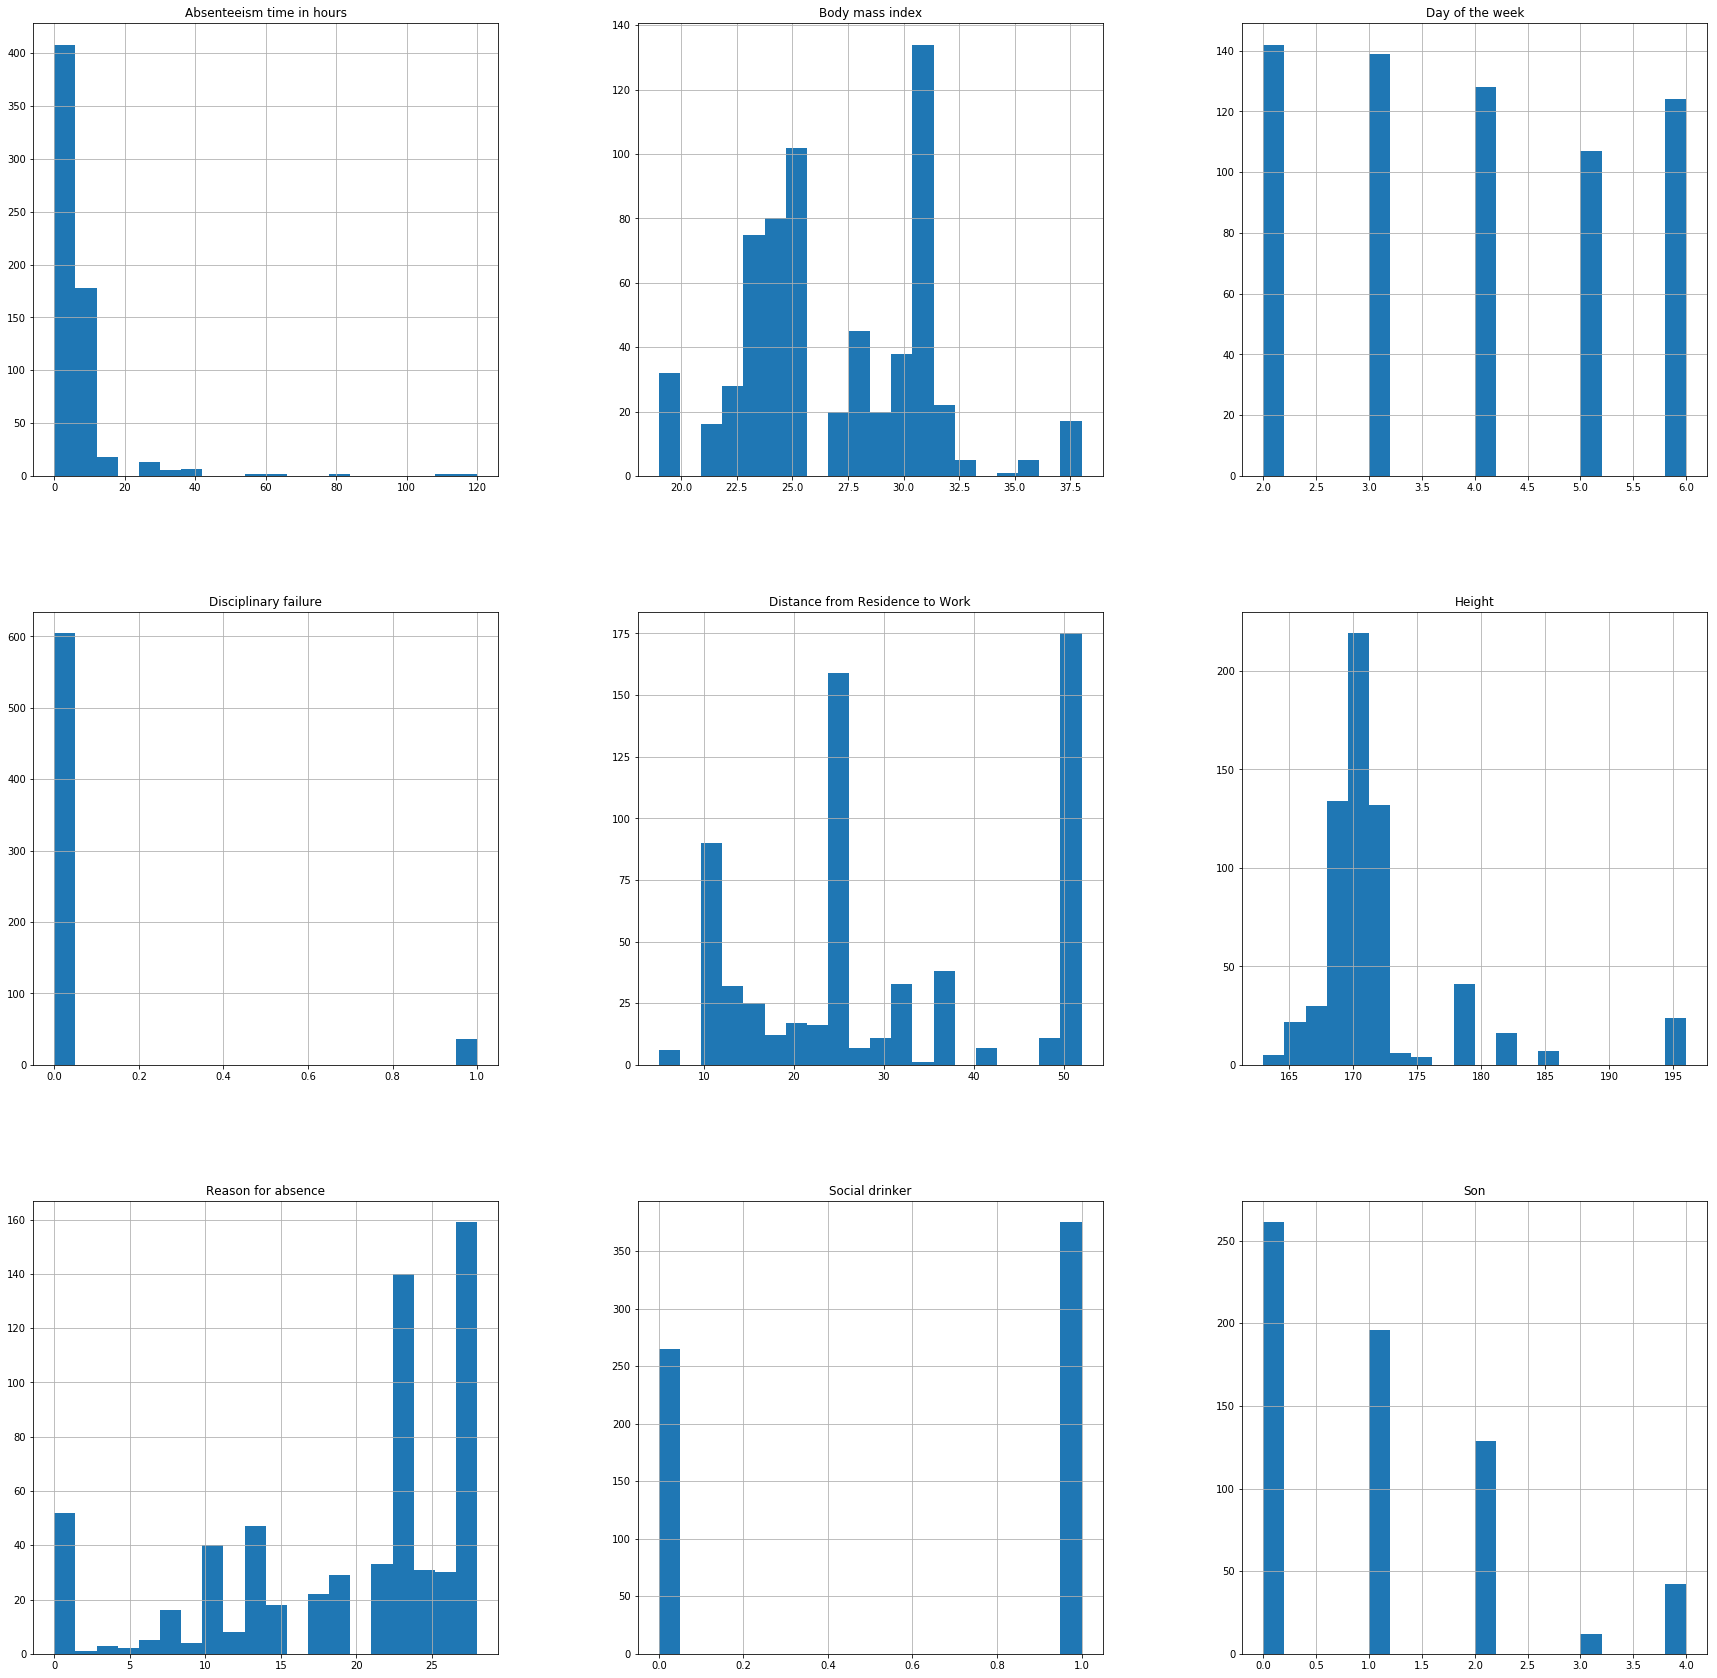

In [8]:
plt.figure(1)
raw_data.hist(bins=20, figsize=(30, 30))
plt.show()

In [9]:
# one-hot encoder
# attr education has been delete, so no need to encoder
# 离散
from sklearn import preprocessing
featureCatCols = ["Day of the week"]
X_vec_cat = raw_data[featureCatCols].values
enc=preprocessing.OneHotEncoder(categories='auto')
enc.fit(X_vec_cat)
X_vec_cat_ed=enc.transform(X_vec_cat).toarray()
X_vec_cat_ed

/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [10]:
# for continuous
# deal with skew
featureConCols = ["Height", "Reason for absence", "Body mass index", "Distance from Residence to Work", "Son"]
dataFeatureCon = raw_data[featureConCols]
for attr in featureConCols:
    if(dataFeatureCon[attr].skew(axis=0) > 1.0):
        dataFeatureCon[attr] = np.log(dataFeatureCon[attr] + 1)

# Standard
X_vec_con = dataFeatureCon.values
scaler=preprocessing.StandardScaler().fit(X_vec_con)
X_vec_con_ed=scaler.transform(X_vec_con)

/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [11]:
# others
featureOthers = ["Disciplinary failure", "Social drinker"]
X_vec_other = raw_data[featureOthers].values

In [12]:
X_vec=np.concatenate((X_vec_con_ed,X_vec_cat_ed, X_vec_other),axis=1)

In [13]:
# 构建 target 向量
# 目标
dataFeatureConTarget = raw_data["Absenteeism time in hours"]
Y_vec = dataFeatureConTarget.values
Y_vec = Y_vec[:, np.newaxis]

In [14]:
# select again
from sklearn.feature_selection import GenericUnivariateSelect, f_classif
attrs = 10
transformer = GenericUnivariateSelect(f_regression, 'k_best', param=attrs)
X_vec_ed = transformer.fit_transform(X_vec, Y_vec)

x_train = X_vec_ed[0 : n_train]
y_train = Y_vec[0 : n_train]
x_test = X_vec_ed[n_train : n_test+n_train]
y_test = Y_vec[n_train : n_test+n_train]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# split train and test data
x_train = X_vec[0 : n_train]
y_train = Y_vec[0 : n_train]
x_test = X_vec[n_train : n_test+n_train]
y_test = Y_vec[n_train : n_test+n_train]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(540, 12) (540, 1) (100, 12) (100, 1)


/home/ddrh/Software/python_venv/general/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


MSE =  164.9904884617109
RMSE =  12.844862337203576
R2 =  0.15522389206819243
R2 =  0.1352536606471043


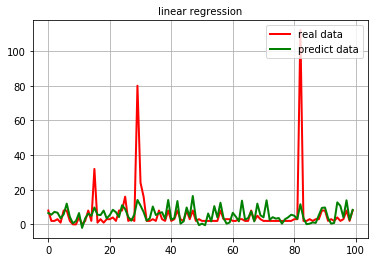

In [15]:
# linear regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression().fit(x_train, y_train)
y_pre = linreg.predict(x_test)
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2 = ', linreg.score(x_train, y_train))
print('R2 = ', linreg.score(x_test, y_test))
plt.figure(2)
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label="real data")
plt.plot(t, y_pre, 'g-', linewidth=2, label="predict data")
plt.legend(loc='upper right')
plt.title("linear regression", fontsize=10)
plt.grid(b=True)
plt.show()

MSE =  164.9904884617109
RMSE =  12.844862337203576
R2 =  0.05780837080659585
R2 =  0.043742360325094376


/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


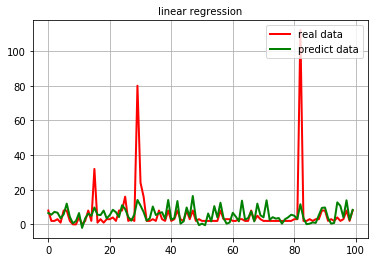

In [16]:
# using svr
from sklearn.svm import SVR
clf = SVR(kernel="linear", C=1.0, epsilon=0.2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pre)
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2 = ', clf.score(x_train, y_train))
print('R2 = ', clf.score(x_test, y_test))
plt.figure(3)
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label="real data")
plt.plot(t, y_pre, 'g-', linewidth=2, label="predict data")
plt.legend(loc='upper right')
plt.title("linear regression", fontsize=10)
plt.grid(b=True)
plt.show()